# Evaluation

In [1]:

from Utils import Misc, TrainTestValid, Pickle, Feature, Evaluation
from Utils.Models import Model, Accuracy
import tensorflow as tf
import numpy as np
import importlib
import os
import gc
os.environ["CUDA_VISIBLE_DEVICES"] = ""
importlib.reload(Evaluation)
importlib.reload(Feature)

<module 'Utils.Feature' from 'd:\\Dev\\DAT5502021\\Utils\\Feature.py'>

Getting the data

In [2]:
model_path = Misc.get_dir('Data','Out','Model')
models = Evaluation.load_models(model_path,None,None)

loading model ALEXNET_cqt.h5...
loading model ALEXNET_mel.h5...
loading model ALEXNET_mfcc.h5...
loading model CNN2D_cqt.h5...
loading model CNN2D_CUSTOM_cqt.h5...
loading model CNN2D_CUSTOM_mel.h5...
loading model CNN2D_CUSTOM_mfcc.h5...
loading model CNN2D_mel.h5...
loading model CNN2D_mfcc.h5...
loading model CNN2D_V2_cqt.h5...
loading model CNN2D_V2_mel.h5...
loading model CNN2D_V2_mfcc.h5...
loading model LSTM_cqt.h5...
loading model LSTM_M2M_cqt.h5...
loading model LSTM_M2M_mel.h5...
loading model LSTM_M2M_mfcc.h5...
loading model LSTM_mel.h5...
loading model LSTM_mfcc.h5...
loading model MLP_1H_cqt.h5...
loading model MLP_1H_mel.h5...
loading model MLP_1H_mfcc.h5...
loading model MLP_cqt.h5...
loading model MLP_mel.h5...
loading model MLP_mfcc.h5...


In [3]:
feature_1D_path = os.path.join(Misc.get_dir('Data','Out','Pickle'),'features_1D.pkl')
label_path =  os.path.join(Misc.get_dir('Data','Out','Pickle'),'labels.pkl')

features_1D = Pickle.load_pickle(feature_1D_path)
labels = Pickle.load_pickle(label_path)
X, y = Evaluation.get_data_dict(Model.MODELS_1D, features_1D, labels)

Loading pickle file from Data\Out\Pickle\features_1D.pkl
Loading pickle file from Data\Out\Pickle\labels.pkl


In [4]:
#models.keys()
X['LSTM']['mel']['train'].shape

(38739, 4, 200)

Get optimal thresholds based on the test data

In [5]:
thresholds = {}
with tf.device('/device:CPU:0'):
    for m_type in Model.MODELS_1D:
        for ft in Feature.FEATURE_TYPES:
            model_name = f'{m_type}_{ft}'
            print(f'processing model name {model_name}')
            if m_type == 'LSTM_M2M':
                y_LSTM_M2M = Evaluation.group_labels_LSTM_M2M(y)
                thresholds[model_name] = Evaluation.determine_opt_threshold(models[model_name](X[m_type][ft]['test']),y_LSTM_M2M['test'])
            else:
                thresholds[model_name] = Evaluation.determine_opt_threshold(models[model_name](X[m_type][ft]['test']),y['test'])

processing model name LSTM_cqt


d:\Dev\DAT5502021\Utils\Evaluation.py:145: RuntimeWarning: invalid value encountered in double_scalars
  f1 = 2*recall[idx]*precision[idx]/(recall[idx]+precision[idx])


processing model name LSTM_mel
processing model name LSTM_mfcc


d:\Dev\DAT5502021\Utils\Evaluation.py:145: RuntimeWarning: invalid value encountered in double_scalars
  f1 = 2*recall[idx]*precision[idx]/(recall[idx]+precision[idx])


processing model name LSTM_M2M_cqt


d:\Dev\DAT5502021\Utils\Evaluation.py:145: RuntimeWarning: invalid value encountered in double_scalars
  f1 = 2*recall[idx]*precision[idx]/(recall[idx]+precision[idx])


processing model name LSTM_M2M_mel


d:\Dev\DAT5502021\Utils\Evaluation.py:145: RuntimeWarning: invalid value encountered in double_scalars
  f1 = 2*recall[idx]*precision[idx]/(recall[idx]+precision[idx])


processing model name LSTM_M2M_mfcc


d:\Dev\DAT5502021\Utils\Evaluation.py:145: RuntimeWarning: invalid value encountered in double_scalars
  f1 = 2*recall[idx]*precision[idx]/(recall[idx]+precision[idx])


processing model name MLP_cqt


d:\Dev\DAT5502021\Utils\Evaluation.py:145: RuntimeWarning: invalid value encountered in double_scalars
  f1 = 2*recall[idx]*precision[idx]/(recall[idx]+precision[idx])


processing model name MLP_mel


d:\Dev\DAT5502021\Utils\Evaluation.py:145: RuntimeWarning: invalid value encountered in double_scalars
  f1 = 2*recall[idx]*precision[idx]/(recall[idx]+precision[idx])


processing model name MLP_mfcc
processing model name MLP_1H_cqt


d:\Dev\DAT5502021\Utils\Evaluation.py:145: RuntimeWarning: invalid value encountered in double_scalars
  f1 = 2*recall[idx]*precision[idx]/(recall[idx]+precision[idx])


processing model name MLP_1H_mel


d:\Dev\DAT5502021\Utils\Evaluation.py:145: RuntimeWarning: invalid value encountered in double_scalars
  f1 = 2*recall[idx]*precision[idx]/(recall[idx]+precision[idx])


processing model name MLP_1H_mfcc


d:\Dev\DAT5502021\Utils\Evaluation.py:145: RuntimeWarning: invalid value encountered in double_scalars
  f1 = 2*recall[idx]*precision[idx]/(recall[idx]+precision[idx])


In [6]:
thresholds

{'LSTM_cqt': 0.045364406,
 'LSTM_mel': 0.04129869,
 'LSTM_mfcc': 0.045412395,
 'LSTM_M2M_cqt': 0.05897093,
 'LSTM_M2M_mel': 0.042365342,
 'LSTM_M2M_mfcc': 0.041632563,
 'MLP_cqt': 0.05127299,
 'MLP_mel': 0.05580631,
 'MLP_mfcc': 0.052892983,
 'MLP_1H_cqt': 0.060652524,
 'MLP_1H_mel': 0.055989653,
 'MLP_1H_mfcc': 0.045399845}

In [8]:
importlib.reload(Evaluation)
feature_2D_path = os.path.join(Misc.get_dir('Data','Out','Pickle'),'features_2D.pkl')
features_2D = Pickle.load_pickle(feature_2D_path)
X_2D, y_2D = Evaluation.get_data_dict_2D(features_2D, labels,0.50)
features_1D = None
features_2D = None
gc.collect()

Loading pickle file from Data\Out\Pickle\features_2D.pkl


1350

In [7]:
with tf.device('/device:CPU:0'):
    for m_type in Model.MODELS_2D:
        for ft in Feature.FEATURE_TYPES:
            gc.collect()
            model_name = f'{m_type}_{ft}'
            try:
                print(f'processing model name {model_name}')
                thresholds[model_name] = Evaluation.determine_opt_threshold(models[model_name](X_2D[ft]['test']),y_2D['test'])
                print(f'\t Success')
            except Exception as e:
                print(f'\t Falied {e}')
            finally:
                pass
gc.collect()

processing model name CNN2D_cqt


D:\Dev\DAT5502021\Utils\Evaluation.py:144: RuntimeWarning: invalid value encountered in double_scalars
  f1 = 2*recall[idx]*precision[idx]/(recall[idx]+precision[idx])


	 Success
processing model name CNN2D_mel


D:\Dev\DAT5502021\Utils\Evaluation.py:144: RuntimeWarning: invalid value encountered in double_scalars
  f1 = 2*recall[idx]*precision[idx]/(recall[idx]+precision[idx])


	 Success
processing model name CNN2D_mfcc


D:\Dev\DAT5502021\Utils\Evaluation.py:144: RuntimeWarning: invalid value encountered in double_scalars
  f1 = 2*recall[idx]*precision[idx]/(recall[idx]+precision[idx])


	 Success
processing model name ALEXNET_cqt


D:\Dev\DAT5502021\Utils\Evaluation.py:144: RuntimeWarning: invalid value encountered in double_scalars
  f1 = 2*recall[idx]*precision[idx]/(recall[idx]+precision[idx])


	 Success
processing model name ALEXNET_mel


D:\Dev\DAT5502021\Utils\Evaluation.py:144: RuntimeWarning: invalid value encountered in double_scalars
  f1 = 2*recall[idx]*precision[idx]/(recall[idx]+precision[idx])


	 Success
processing model name ALEXNET_mfcc
	 Success
processing model name CNN2D_V2_cqt


D:\Dev\DAT5502021\Utils\Evaluation.py:144: RuntimeWarning: invalid value encountered in double_scalars
  f1 = 2*recall[idx]*precision[idx]/(recall[idx]+precision[idx])


	 Success
processing model name CNN2D_V2_mel
	 Success
processing model name CNN2D_V2_mfcc
	 Success
processing model name CNN2D_CUSTOM_cqt


D:\Dev\DAT5502021\Utils\Evaluation.py:144: RuntimeWarning: invalid value encountered in double_scalars
  f1 = 2*recall[idx]*precision[idx]/(recall[idx]+precision[idx])


	 Success
processing model name CNN2D_CUSTOM_mel


D:\Dev\DAT5502021\Utils\Evaluation.py:144: RuntimeWarning: invalid value encountered in double_scalars
  f1 = 2*recall[idx]*precision[idx]/(recall[idx]+precision[idx])


	 Success
processing model name CNN2D_CUSTOM_mfcc
	 Success


D:\Dev\DAT5502021\Utils\Evaluation.py:144: RuntimeWarning: invalid value encountered in double_scalars
  f1 = 2*recall[idx]*precision[idx]/(recall[idx]+precision[idx])


0

Get the evaluation measures based on the validation data

In [19]:
preds = {}
with tf.device('/device:CPU:0'):
    for m_type in Model.MODELS_1D:# ['MLP', 'MLP_1H', 'LSTM', 'LSTM_M2M']:
        for ft in Feature.FEATURE_TYPES: #['cqt', 'mel', 'mfcc']:
            model_name = m_type+'_'+ft
            preds[model_name] = models[model_name](X[m_type][ft]['valid'])
        

In [20]:
with tf.device('/device:CPU:0'):
    for m_type in Model.MODELS_2D:# ['MLP', 'MLP_1H', 'LSTM', 'LSTM_M2M']:
        for ft in Feature.FEATURE_TYPES: #['cqt', 'mel', 'mfcc']:
            model_name = m_type+'_'+ft
            preds[model_name] = models[model_name](X_2D[ft]['valid'])

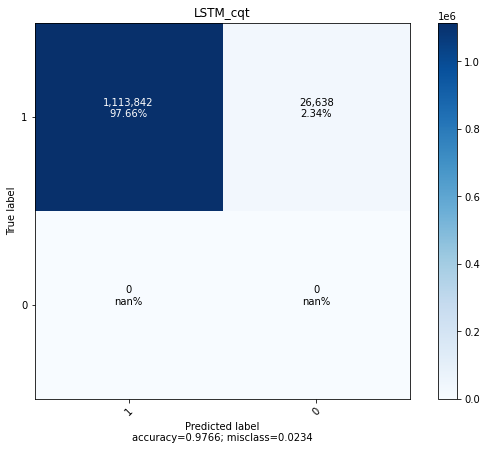

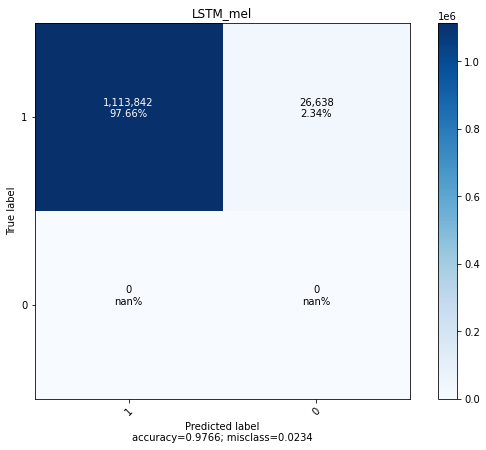

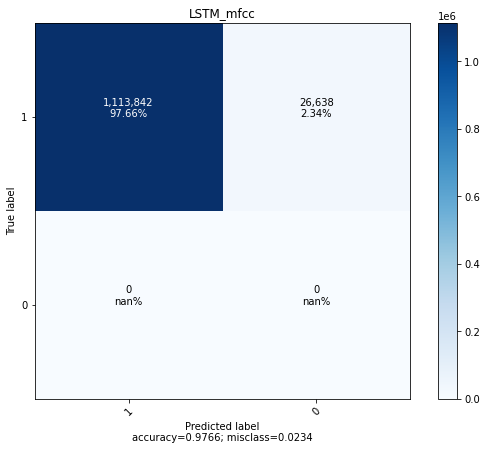

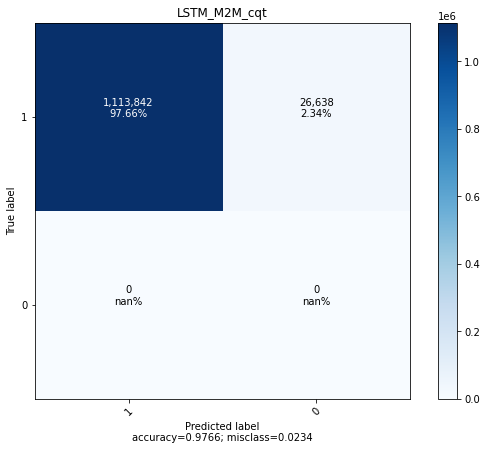

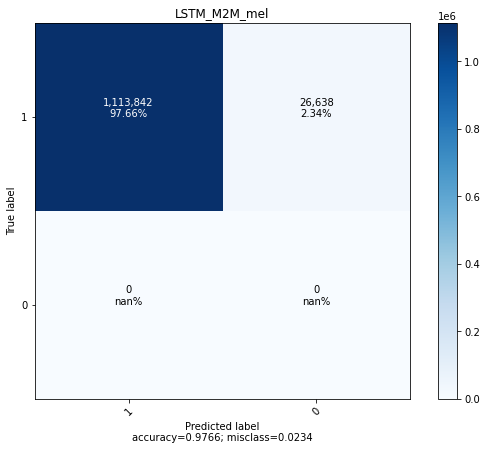

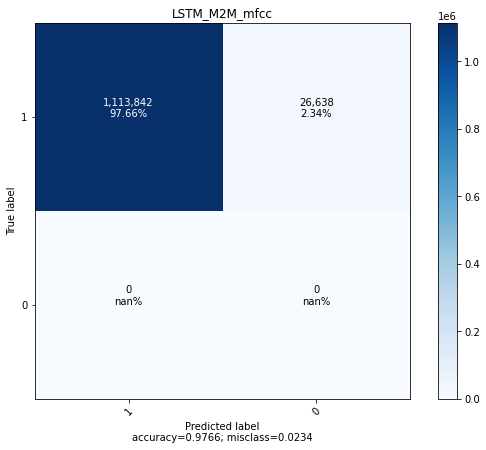

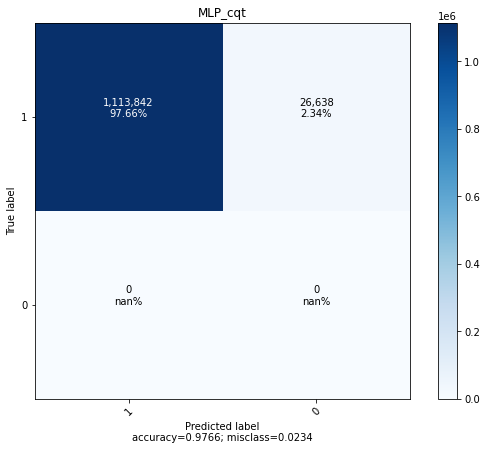

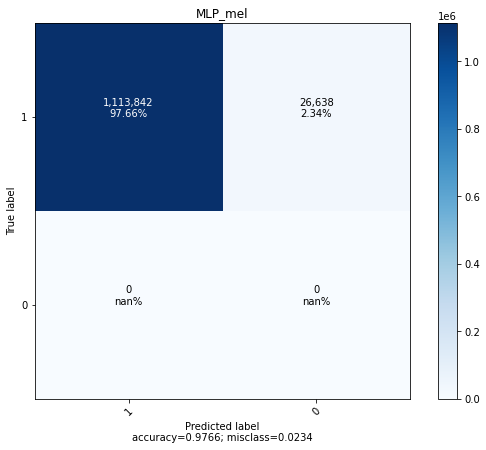

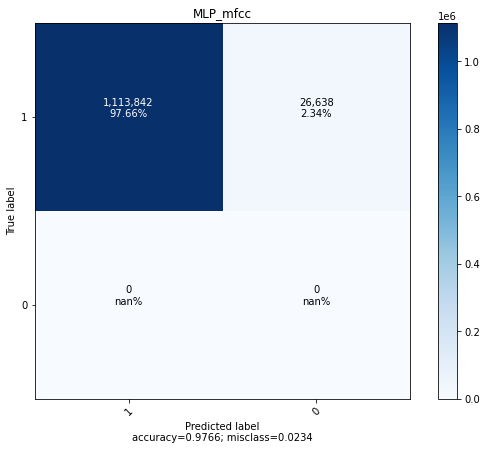

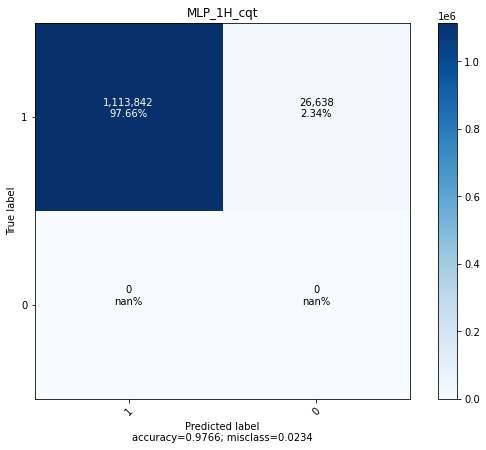

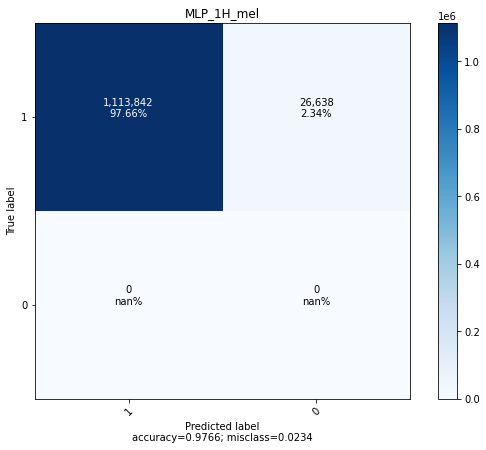

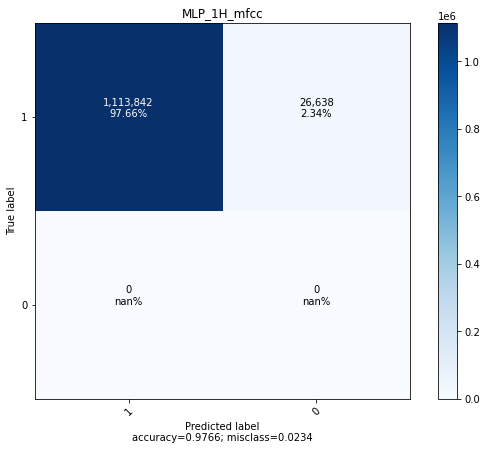

In [81]:
importlib.reload(Evaluation)
for model in Model.MODELS_1D:
    for feature in Feature.FEATURE_TYPES:
        f = model + '_' + feature
        pred = preds[f]
        theshold = thresholds[f]
        cm = Evaluation.get_confusion_matrix(pred, y['valid']).numpy()
        Evaluation.plot_confusion_matrix(cm,['1','0'],title = f)


In [62]:
y_2D['valid']

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [76]:
y_2D['valid'][y_2D['valid'] < 0] = 0

In [75]:
pred

<tf.Tensor: shape=(12960, 88), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [89]:
pred[pred < 0]

<tf.Tensor: shape=(0,), dtype=float32, numpy=array([], dtype=float32)>

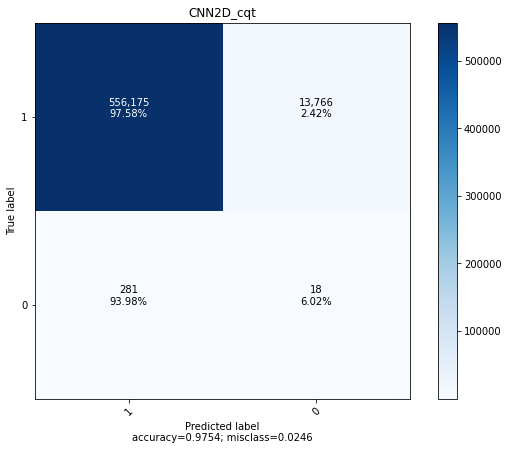

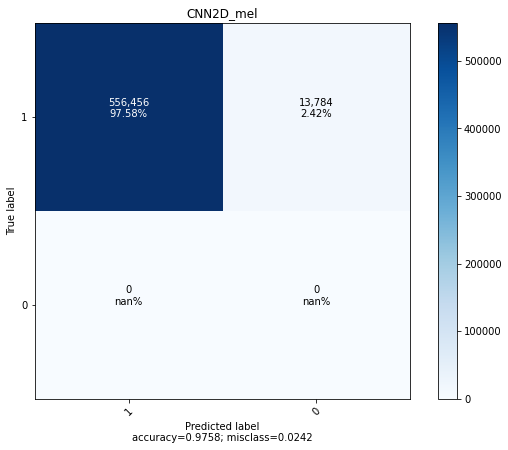

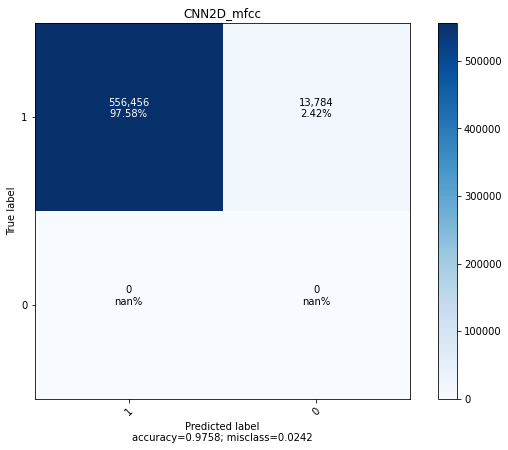

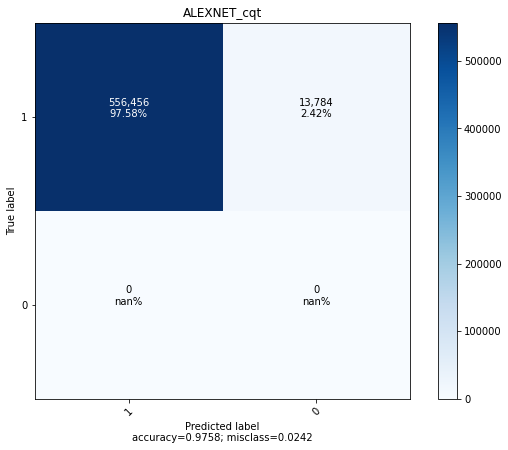

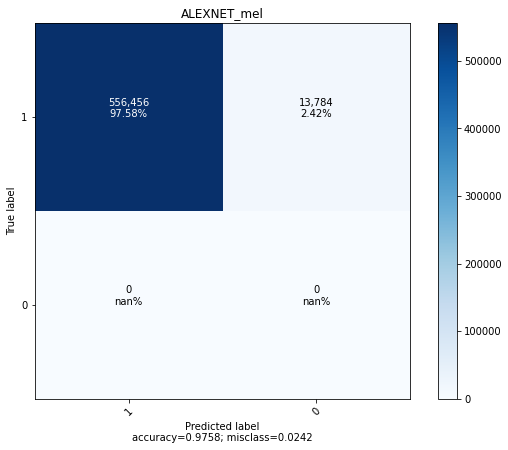

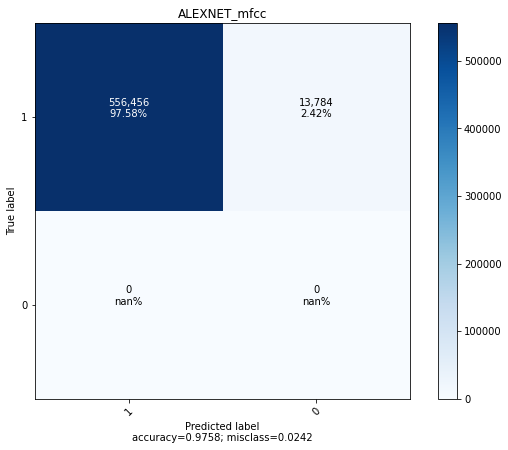

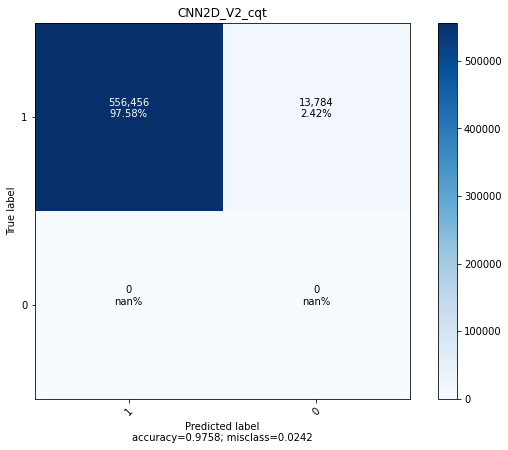

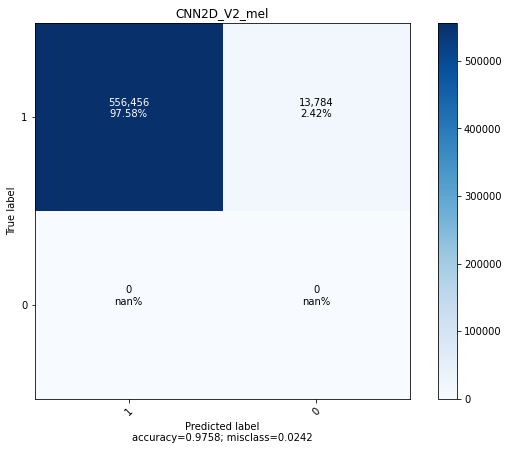

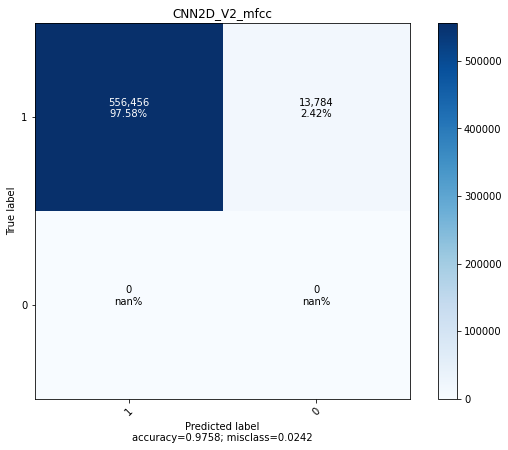

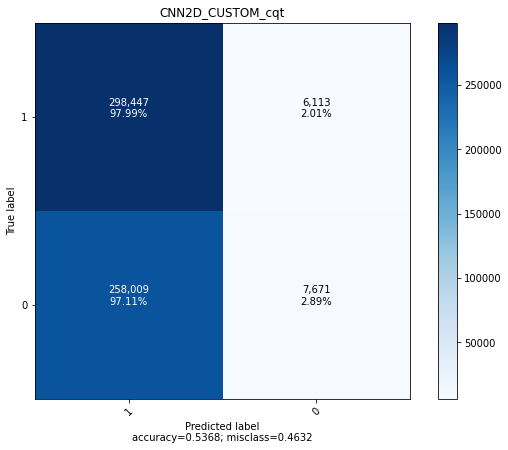

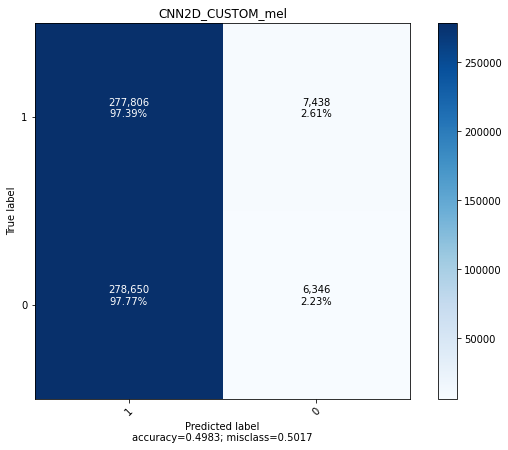

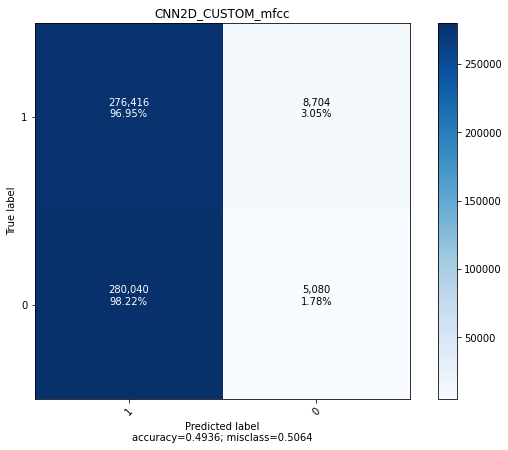

In [90]:
importlib.reload(Evaluation)
for model in Model.MODELS_2D:
    for feature in Feature.FEATURE_TYPES:
        f = model + '_' + feature
        pred = preds[f]
        theshold = thresholds[f]
        pred = tf.nn.relu(pred)
        cm = Evaluation.get_confusion_matrix(pred, y_2D['valid'], ).numpy()
        Evaluation.plot_confusion_matrix(cm,['1','0'],title=f)

In [ ]:
Evaluation.get_confusion_matrix(preds[key], y['valid'], threshold=thresholds[key]).numpy()
#Evaluation.plot_roc_curve(preds[key], y['valid'])

In [95]:
preds.keys()

dict_keys(['LSTM_cqt', 'LSTM_mel', 'LSTM_mfcc', 'LSTM_M2M_cqt', 'LSTM_M2M_mel', 'LSTM_M2M_mfcc', 'MLP_cqt', 'MLP_mel', 'MLP_mfcc', 'MLP_1H_cqt', 'MLP_1H_mel', 'MLP_1H_mfcc', 'CNN2D_cqt', 'CNN2D_mel', 'CNN2D_mfcc', 'ALEXNET_cqt', 'ALEXNET_mel', 'ALEXNET_mfcc', 'CNN2D_V2_cqt', 'CNN2D_V2_mel', 'CNN2D_V2_mfcc', 'CNN2D_CUSTOM_cqt', 'CNN2D_CUSTOM_mel', 'CNN2D_CUSTOM_mfcc'])

Area under curve: 0.702444265637681


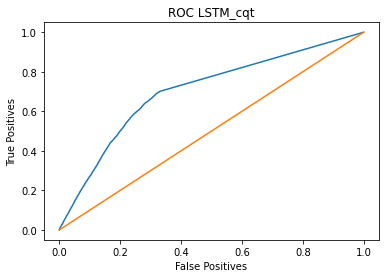

Area under curve: 0.6596712577565429


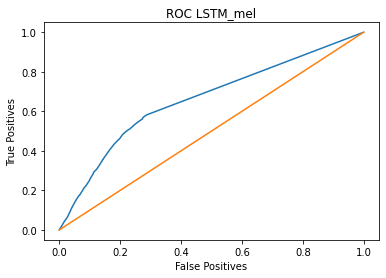

Area under curve: 0.6869251691775933


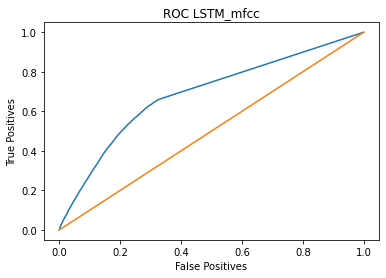

Area under curve: 0.75905005970829


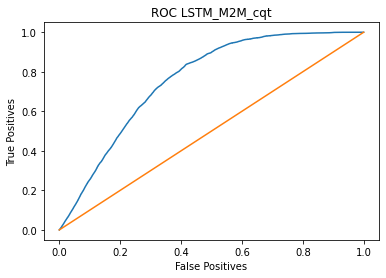

Area under curve: 0.7590720596236837


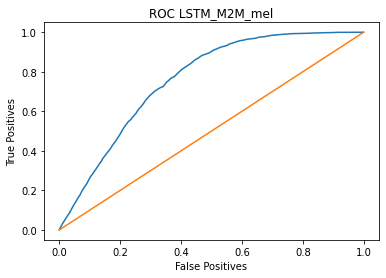

Area under curve: 0.7585492928225207


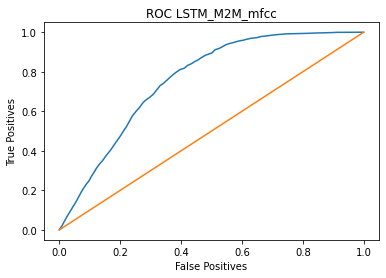

Area under curve: 0.7636190546196528


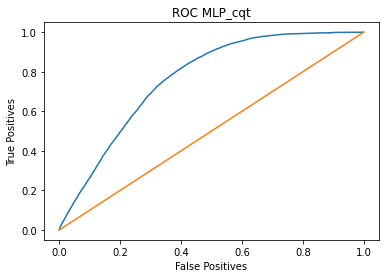

Area under curve: 0.7738395083843805


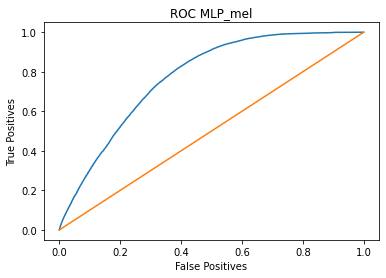

Area under curve: 0.7740587905978089


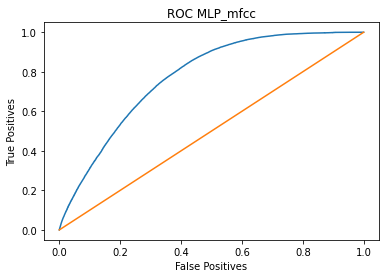

Area under curve: 0.7641889018848428


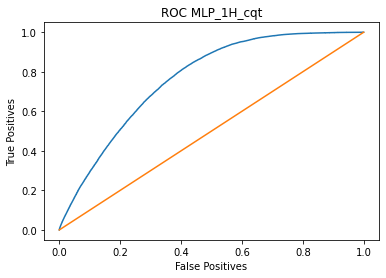

Area under curve: 0.7688861105952977


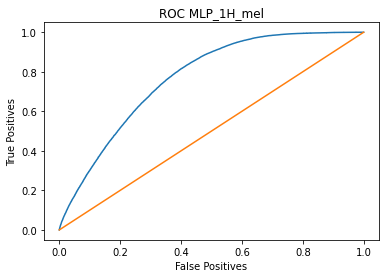

Area under curve: 0.7639368255412411


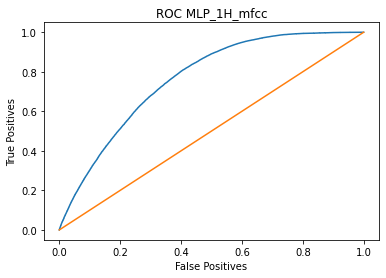

In [103]:
for model in Model.MODELS_1D:
    for feature in Feature.FEATURE_TYPES:
        f = model + '_' + feature
        if key.find('LSTM_M2M') >= 0:
            Evaluation.plot_roc_curve(preds[f], y_LSTM_M2M['valid'])
        else:
            Evaluation.plot_roc_curve(preds[f], y['valid'],title='ROC '+ f)

Area under curve: 0.7610707756901856


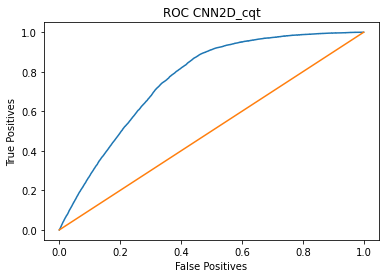

Area under curve: 0.7687213778649294


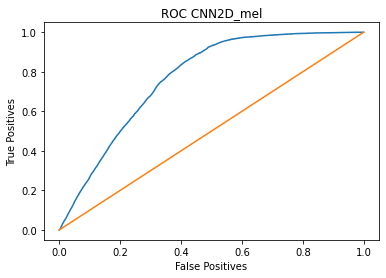

Area under curve: 0.7627430397187747


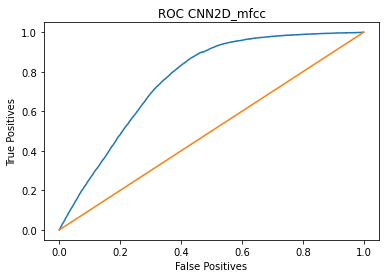

Area under curve: 0.49873343644313695


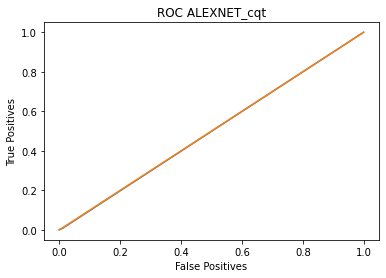

Area under curve: 0.49698032552025984


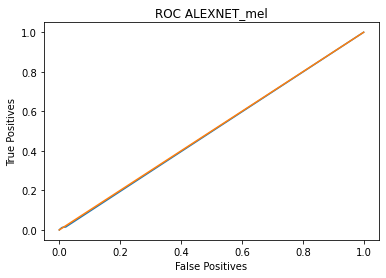

Area under curve: 0.5


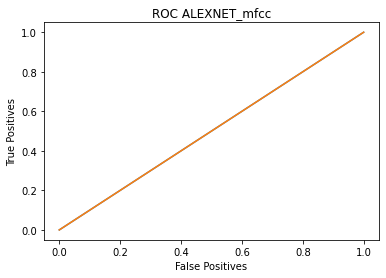

Area under curve: 0.7703669029192216


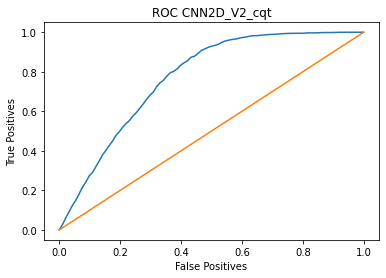

Area under curve: 0.7692327013463055


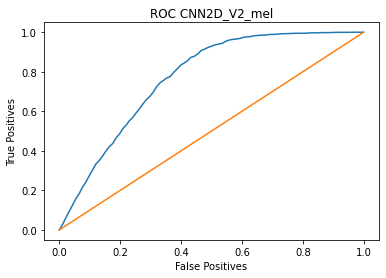

Area under curve: 0.7697793058334326


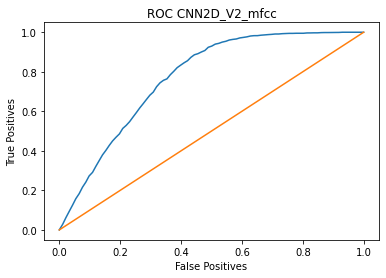

Area under curve: 0.5383848620489051


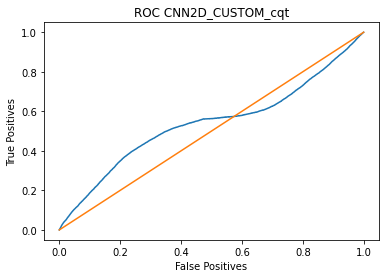

Area under curve: 0.47864321039075075


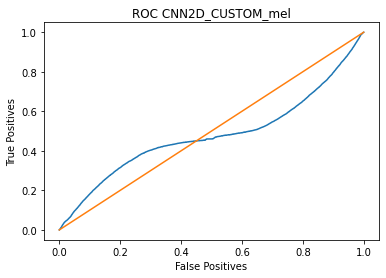

Area under curve: 0.4324919772542819


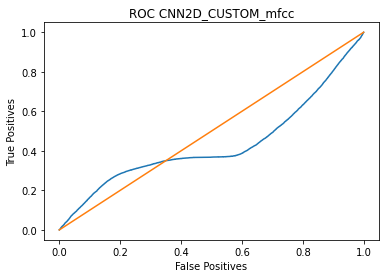

In [102]:
importlib.reload(Evaluation)
for model in Model.MODELS_2D:
    for feature in Feature.FEATURE_TYPES:
        f = model + '_' + feature
        Evaluation.plot_roc_curve(preds[f], y_2D['valid'],title='ROC '+ f)

In [107]:
from Utils import Pickle
Pickle.dump_pickle('Data/Out/Pickle/predictions.pkl',preds)

Saving pickle file into Data/Out/Pickle/predictions.pkl


In [119]:
for model in Model.MODELS_1D:
    for feature in Feature.FEATURE_TYPES:
        f = model + '_' + feature
        y_feature = None
        if key.find('LSTM_M2M') >= 0:
             y_feature = y_LSTM_M2M['valid']
        else:
            y_feature = y['valid']
        print(f'{f}-accuracy', Evaluation.get_metric(preds[f], y_feature, 'accuracy', thresholds[f]),sep=' & ')
        print(f'{f}-precision', Evaluation.get_metric(preds[f], y_feature, 'precision', thresholds[f]),sep=' & ')
        print(f'{f}-recall', Evaluation.get_metric(preds[f], y_feature, 'recall', thresholds[f]),sep=' & ')
        print(f'{f}-f1',  Evaluation.get_metric(preds[f], y_feature, 'F1', thresholds[f]),sep=' & ')
        

LSTM_cqt-accuracy & 0.837914737654321
LSTM_cqt-precision & 0.05948781343445649
LSTM_cqt-recall & 0.40104362189353554
LSTM_cqt-f1 & 0.10360729508633942
LSTM_mel-accuracy & 0.8173637415824916
LSTM_mel-precision & 0.054808620765712995
LSTM_mel-recall & 0.4197762594789399
LSTM_mel-f1 & 0.0969578204866967
LSTM_mfcc-accuracy & 0.8387766554433221
LSTM_mfcc-precision & 0.059420533512665324
LSTM_mfcc-recall & 0.39804039342292963
LSTM_mfcc-f1 & 0.10340455826563552
LSTM_M2M_cqt-accuracy & 0.8398113075196408
LSTM_M2M_cqt-precision & 0.056785649368354084
LSTM_M2M_cqt-recall & 0.37529093775808997
LSTM_M2M_cqt-f1 & 0.0986451950307372
LSTM_M2M_mel-accuracy & 0.778443287037037
LSTM_M2M_mel-precision & 0.055010689523479546
LSTM_M2M_mel-recall & 0.5245138523913206
LSTM_M2M_mel-f1 & 0.09957772828507795
LSTM_M2M_mfcc-accuracy & 0.7531916386083053
LSTM_M2M_mfcc-precision & 0.05417273134411913
LSTM_M2M_mfcc-recall & 0.5812373301298897
LSTM_M2M_mfcc-f1 & 0.09910832591871875
MLP_cqt-accuracy & 0.84684431116722

In [128]:
'a'.upper()

'A'

In [135]:
for model in Model.MODELS_2D:
    print(f'\multicolumn{{6}}{{l}}{{ {model} }}   \\\\')
    for feature in Feature.FEATURE_TYPES:
        try:
            f = model + '_' + feature
            y_feature = y_2D['valid']
            acc = round(Evaluation.get_metric(preds[f], y_feature, 'accuracy', thresholds[f]),4)
            prec = round(Evaluation.get_metric(preds[f], y_feature, 'precision', thresholds[f]),4)
            rec = round(Evaluation.get_metric(preds[f], y_feature, 'recall', thresholds[f]),4)
            f1 = round(Evaluation.get_metric(preds[f], y_feature, 'F1', thresholds[f]),4)
            print(feature.upper(), acc, prec, rec, f1, '\\\\',sep = ' & ')
        except Exception as e:
            pass
        
        
        

\multicolumn{6}{l}{ CNN2D }   \\
CQT & 0.7882 & 0.0572 & 0.5014 & 0.1027 & \\
MEL & 0.7346 & 0.0548 & 0.6138 & 0.1006 & \\
MFCC & 0.8069 & 0.0567 & 0.4471 & 0.1007 & \\
\multicolumn{6}{l}{ ALEXNET }   \\
CQT & 0.0242 & 0.0242 & 1.0 & 0.0472 & \\
MEL & 0.0242 & 0.0242 & 1.0 & 0.0472 & \\
MFCC & 0.0242 & 0.0242 & 1.0 & 0.0472 & \\
\multicolumn{6}{l}{ CNN2D_V2 }   \\
CQT & 0.7746 & 0.0573 & 0.5385 & 0.1035 & \\
MEL & 0.7742 & 0.0564 & 0.5306 & 0.102 & \\
MFCC & 0.8053 & 0.0587 & 0.4688 & 0.1043 & \\
\multicolumn{6}{l}{ CNN2D_CUSTOM }   \\


## Statistical Significance Test (alpha = 5%)

In [132]:
Evaluation.is_difference_significant(
    preds['MLP_mfcc'],
    preds['MLP_mel'],
    thresholds['MLP_mfcc'],
    thresholds['MLP_mel'],
    y['valid'],
    y['valid'])

True